In [2]:
from Bio import Entrez
from Bio.Blast import NCBIWWW, NCBIXML

#### Obtaining Sequence From NCBI

In [3]:
Entrez.email = 'tobijohnson01@gmail.com'

In [4]:
handle = Entrez.einfo()

In [5]:
result = Entrez.read(handle)

In [6]:
result

{'DbList': ['pubmed', 'protein', 'nuccore', 'ipg', 'nucleotide', 'structure', 'genome', 'annotinfo', 'assembly', 'bioproject', 'biosample', 'blastdbinfo', 'books', 'cdd', 'clinvar', 'gap', 'gapplus', 'grasp', 'dbvar', 'gene', 'gds', 'geoprofiles', 'medgen', 'mesh', 'nlmcatalog', 'omim', 'orgtrack', 'pmc', 'popset', 'proteinclusters', 'pcassay', 'protfam', 'pccompound', 'pcsubstance', 'seqannot', 'snp', 'sra', 'taxonomy', 'biocollections', 'gtr']}

In [7]:
handle.close()

In [40]:
# Human, Chimpanzee, Bonobo and Orangutan mtDNA accession numbers
accession_nos = ['NC_012920.1', 'NC_001643.1', 'NC_001644.1', 'NC_002083.1']

def obtain_DNA(*accession_nos):
    records = []
    for accession_no in accession_nos:
        handle = Entrez.efetch(db='nuccore', id=accession_no, rettype='genbank', retmode='text')
        result = handle.read()
        import io
        file = io.StringIO(result)
        from Bio import SeqIO
        record = SeqIO.read(file, 'gb')
        records.append(record)
    return SeqIO.write(records, 'mtDNAs.gb', 'gb')

In [41]:
obtain_DNA(*accession_nos)

4

In [42]:
clustal_executable = 'C:\\Users\\tobij\\Desktop\\clustal-omega-1.2.2-win64\\clustalo.exe'

In [45]:
cmd = [clustal_executable, '--infile=mtDNAs.gb', '--outfile=aligned_mtDNAs.fasta', '--outfmt=fasta']

In [46]:
import subprocess
subprocess.run(cmd, check=True)

CompletedProcess(args=['C:\\Users\\tobij\\Desktop\\clustal-omega-1.2.2-win64\\clustalo.exe', '--infile=mtDNAs.gb', '--outfile=aligned_mtDNAs.fasta', '--outfmt=fasta'], returncode=0)

In [47]:
from Bio import AlignIO

In [57]:
alignments = AlignIO.read('aligned_mtDNAs.fasta', 'fasta')

In [58]:
for alignment in alignments:
    print(alignments)

Alignment with 4 rows and 17199 columns
gatcacaggtctatcaccctattaaccactcacgggagctctcc...--- NC_012920
--------------------------------------------...aca NC_001643
--------------------------------------------...aca NC_001644
--------------------------------------------...cg- NC_002083
Alignment with 4 rows and 17199 columns
gatcacaggtctatcaccctattaaccactcacgggagctctcc...--- NC_012920
--------------------------------------------...aca NC_001643
--------------------------------------------...aca NC_001644
--------------------------------------------...cg- NC_002083
Alignment with 4 rows and 17199 columns
gatcacaggtctatcaccctattaaccactcacgggagctctcc...--- NC_012920
--------------------------------------------...aca NC_001643
--------------------------------------------...aca NC_001644
--------------------------------------------...cg- NC_002083
Alignment with 4 rows and 17199 columns
gatcacaggtctatcaccctattaaccactcacgggagctctcc...--- NC_012920
--------------------------------------------...

#### Phylogenetic Tree Construction

In [67]:
from Bio import Phylo
from Bio.Phylo.TreeConstruction import DistanceCalculator, DistanceTreeConstructor

In [73]:
calc = DistanceCalculator('identity')

In [74]:
dm = calc.get_distance(alignments)
dm

DistanceMatrix(names=['NC_012920', 'NC_001643', 'NC_001644', 'NC_002083'], matrix=[[0], [0.14774114774114777, 0], [0.1471015756730042, 0.04064189778475491, 0], [0.1986161986161986, 0.1558230129658701, 0.15500901215186924, 0]])

In [80]:
const = DistanceTreeConstructor(calc, 'upgma')

In [82]:
tree = const.build_tree(alignments)

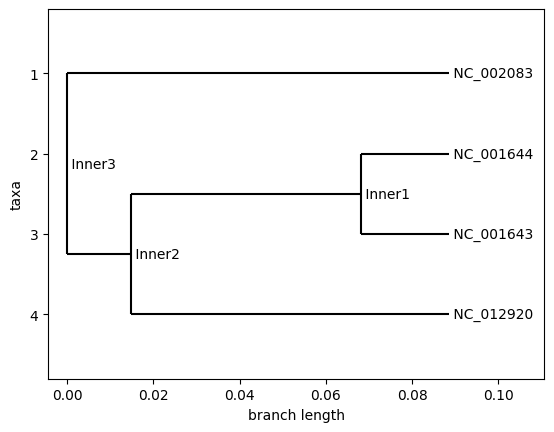

In [83]:
Phylo.draw(tree)

#### Identifying Conserved Regions

In [9]:
from Bio import AlignIO
from collections import Counter

alignment = AlignIO.read('aligned_mtDNAs.fasta', 'fasta')

In [15]:
print(alignment)

Alignment with 4 rows and 17199 columns
gatcacaggtctatcaccctattaaccactcacgggagctctcc...--- NC_012920
--------------------------------------------...aca NC_001643
--------------------------------------------...aca NC_001644
--------------------------------------------...cg- NC_002083


In [23]:
# Function to check if a column is conserved
def is_conserved(column):
    counts = Counter(column)
    # A column is conserved if the most common base appears in all sequences
    most_common_base, count = counts.most_common(1)[0]
    return count == len(column)

# Analyze the alignment to find conserved and divergent regions
conserved_regions = []
divergent_regions = []
window_size = 10  # Define a window size for identifying regions

# Iterate through the alignment
for i in range(len(alignment[0])):
    column = alignment[:, i]
    if is_conserved(column):
        conserved_regions.append(i)
    else:
        divergent_regions.append(i)

In [35]:
# Identify consecutive conserved and divergent regions
def find_regions(indices):
    regions = []
    if not indices:
        return regions
    start = indices[0]
    end = start
    for i in range(1, len(indices)):
        if indices[i] == end + 1:
            end = indices[i]
        else:
            regions.append((start, end))
            start = indices[i]
            end = start
    regions.append((start, end))
    return regions

conserved_regions = find_regions(conserved_regions)
divergent_regions = find_regions(divergent_regions)

print("Conserved regions:")
for start, end in conserved_regions:
    print(f"Start: {start}, End: {end}")

print("\nDivergent regions:")
for start, end in divergent_regions:
    print(f"Start: {start}, End: {end}")


Conserved regions:
Start: 576, End: 589
Start: 595, End: 595
Start: 598, End: 605
Start: 607, End: 618
Start: 620, End: 620
Start: 622, End: 627
Start: 631, End: 631
Start: 633, End: 633
Start: 635, End: 635
Start: 637, End: 649
Start: 651, End: 684
Start: 686, End: 687
Start: 689, End: 706
Start: 709, End: 709
Start: 712, End: 713
Start: 715, End: 719
Start: 721, End: 722
Start: 724, End: 728
Start: 730, End: 731
Start: 733, End: 734
Start: 736, End: 736
Start: 740, End: 741
Start: 744, End: 745
Start: 747, End: 750
Start: 752, End: 755
Start: 757, End: 765
Start: 767, End: 768
Start: 770, End: 771
Start: 774, End: 782
Start: 784, End: 788
Start: 790, End: 812
Start: 814, End: 824
Start: 826, End: 826
Start: 829, End: 849
Start: 851, End: 858
Start: 860, End: 860
Start: 862, End: 868
Start: 870, End: 882
Start: 884, End: 890
Start: 892, End: 905
Start: 907, End: 913
Start: 915, End: 921
Start: 923, End: 928
Start: 932, End: 938
Start: 940, End: 952
Start: 954, End: 955
Start: 961, End

In [19]:
from Bio.Align import PairwiseAligner

In [20]:
aligner = PairwiseAligner()

In [21]:
aligner.mode = 'global'
aligner.match_score = 1
aligner.mismatch_score = -1
aligner.open_gap_score = -0.5
aligner.extend_gap_score = -0.1

In [22]:
def scores(refseq, *mutant_seqs):
    alignment_scores = []
    for mutant_seq in mutant_seqs:
        alignments = aligner.align(refseq, mutant_seq)
        alignment_scores.append(alignments.score)
    return alignment_scores

In [24]:
mutant_seqs = [mutant_seq1, mutant_seq2, mutant_seq3]

In [25]:
scores(refseq, *mutant_seqs)

[16568.5, 16567.5, 16567.0]

In [26]:
from Bio import motifs
instances = []
m = motifs.create(instances)

In [28]:
m.degenerate_consensus

Seq('SWRYCRSMSY')